# **Data Visualization using Matplotib, Seaborn and Folium** 

In [1]:
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, I aim to gain insights into how recessions impacted automobile sales for the company.


---


# Importing Data


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis


### Line Chart showing Automobile Sales Over Time (MatPlotLib)


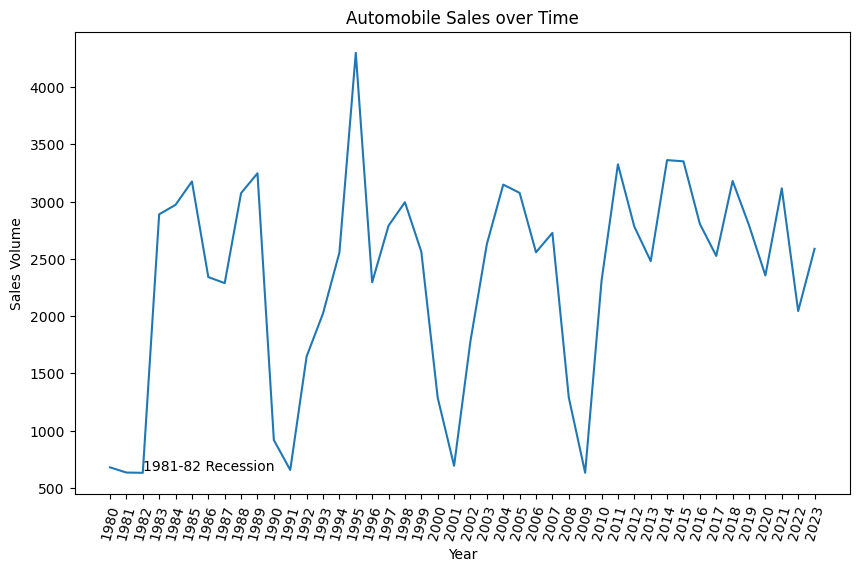

In [10]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.text(1982, 650, '1981-82 Recession')
plt.show()


####  Plotting the Sales Trend according to Vehicle Type, during Recession (MatPlotLib)


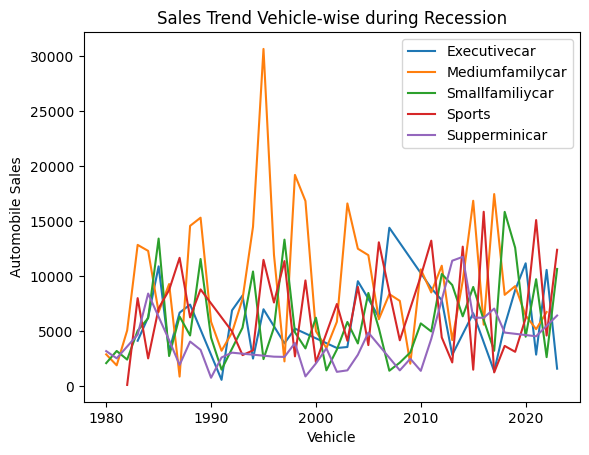

In [11]:
    df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('Vehicle')
    plt.ylabel('Automobile Sales')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

Inference:
From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle, while sales of the superminicar and smallfamilycar increased.


### Comparing Automobile Sales during Recession and Non-Recession (Seaborn)


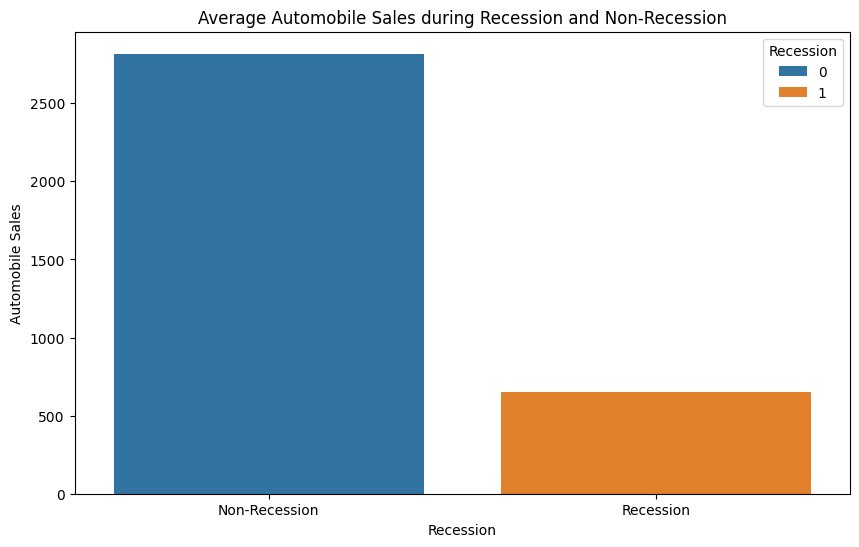

In [13]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Comparing Automobile Sales during Recession and Non-Recession, including Vehicle Type (Seaborn)


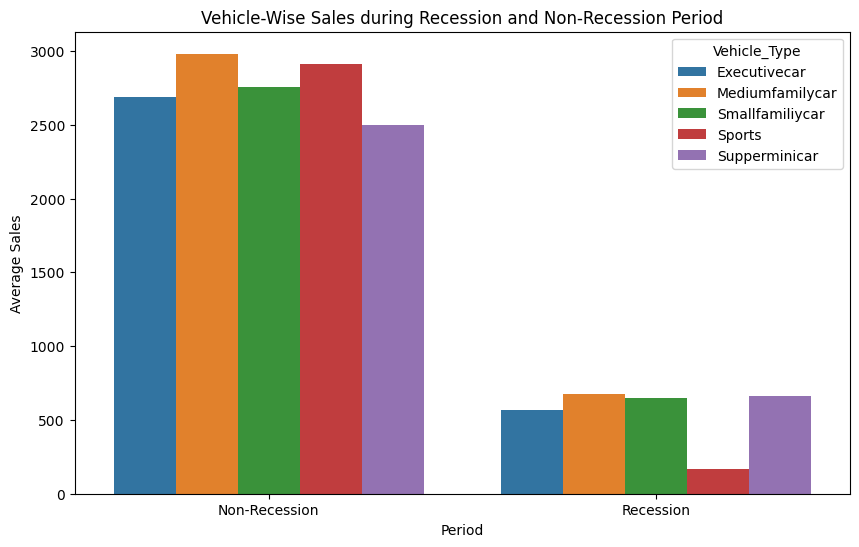

In [14]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

Inference:
From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession. However, the most affected type of vehicle is executivecar and sports.


---


### GDP Variation during Recession and Non-Recession Periods using Subplots (MatPlotLib and Seaborn)


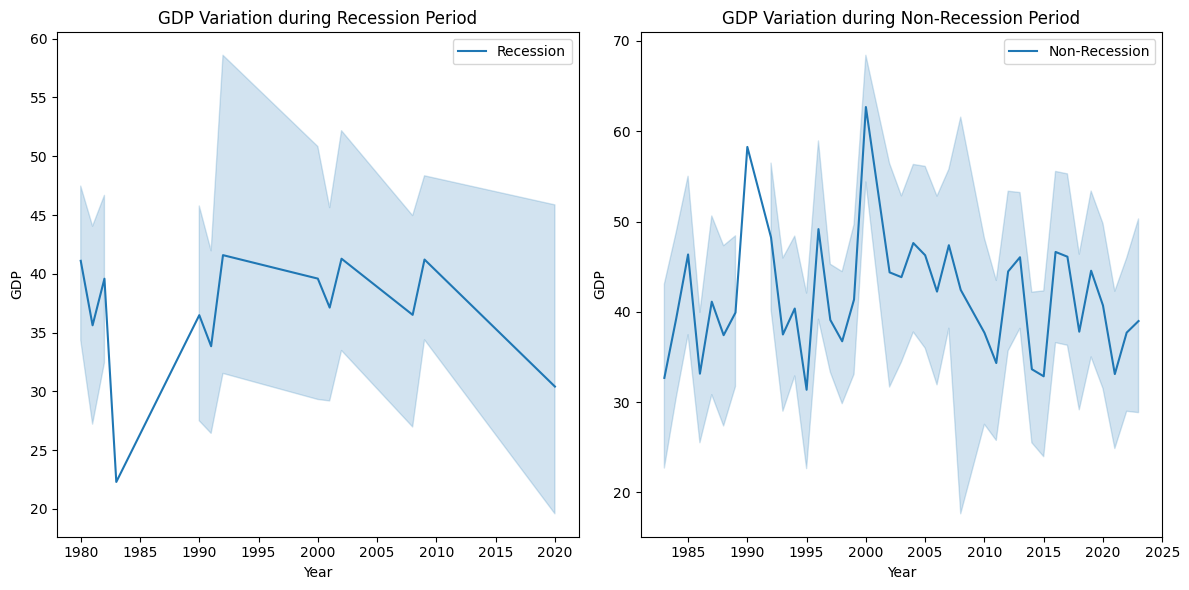

In [15]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig=plt.figure(figsize=(12, 6))
    
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1 ,2 ,2 ) 
    
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()


Inference: From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company.


---


### Bubble Plot showing whether Seasonality affected Automobile Sales (Seaborn)

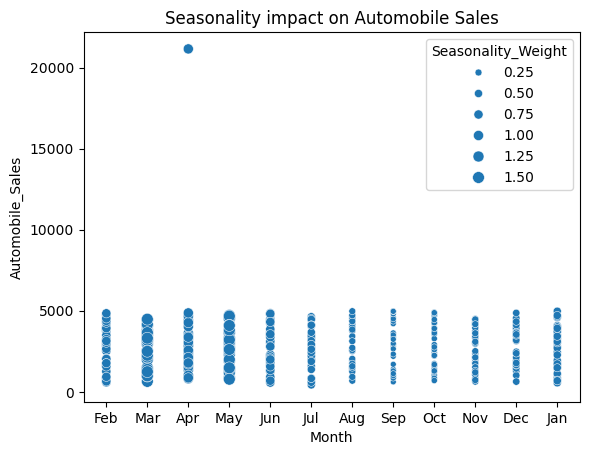

In [17]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

Inference:
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.


---


 ### Scatter Plot showing Consumer Confidence and Automobile Sales during Recessions (MatPlotLib)


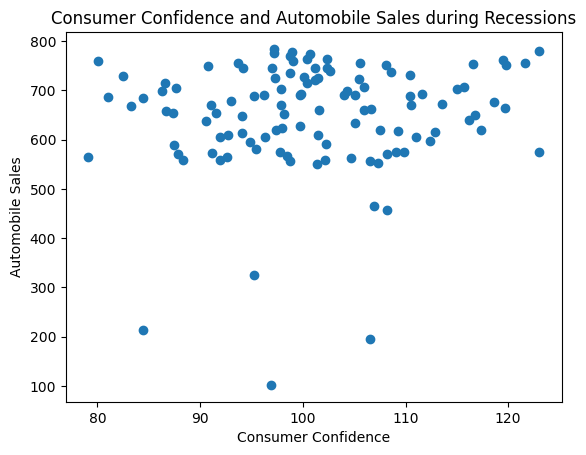

In [18]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

### Scatter Plot showing the Relationship between Average Vehicle Price and Sales during Recessions (MatPlotLib)

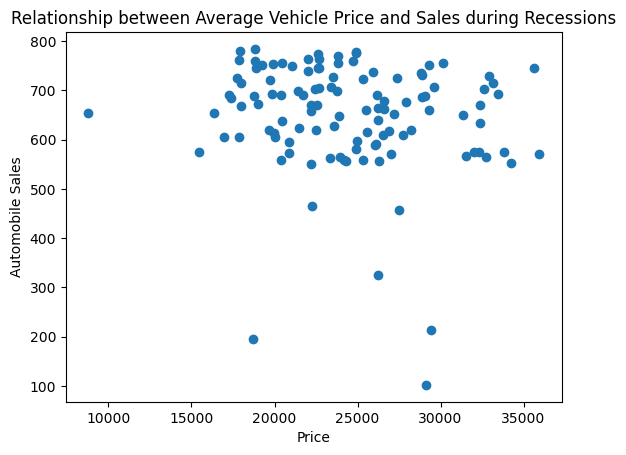

In [20]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

Inference:
There is not much relation!

----


 ### Pie Chart showing Advertising Expendituree during Recession and Non-Recession Periods (MatPlotLib)


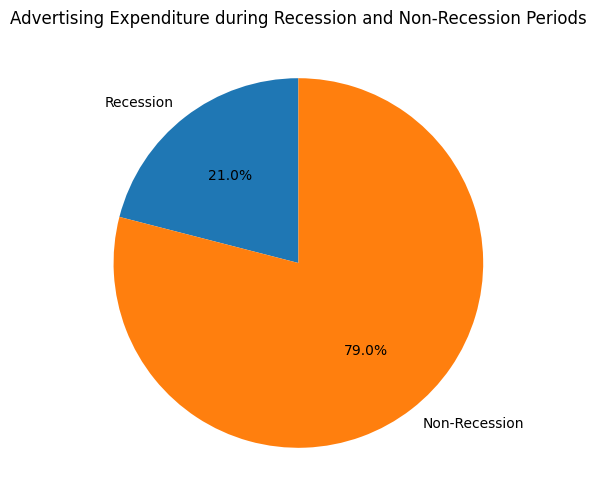

In [22]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
    
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

Inference: 
It seems XYZAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.


---


### Pie Chart showing Share of Each Vehicle Type in Total Sales during Recessions (MatPlotLib)


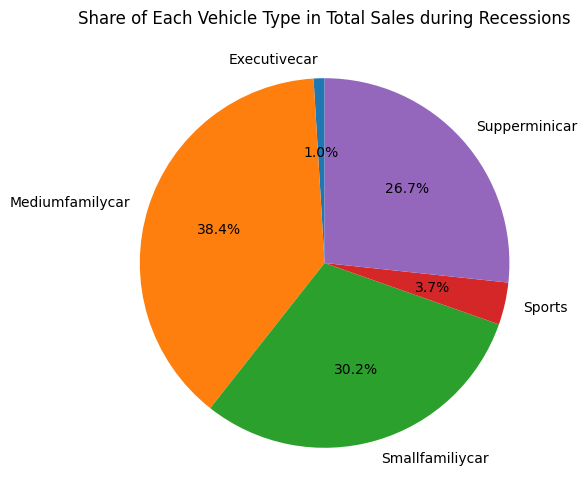

In [23]:
Rdata = df[df['Recession'] == 1]

VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

Inference:
During recession the advertisements were mostly focued on low price range vehicle. 


----


 ### Countplot showing the effect of the unemployment rate on vehicle type and sales during the Recession Period (MatPlotLib)


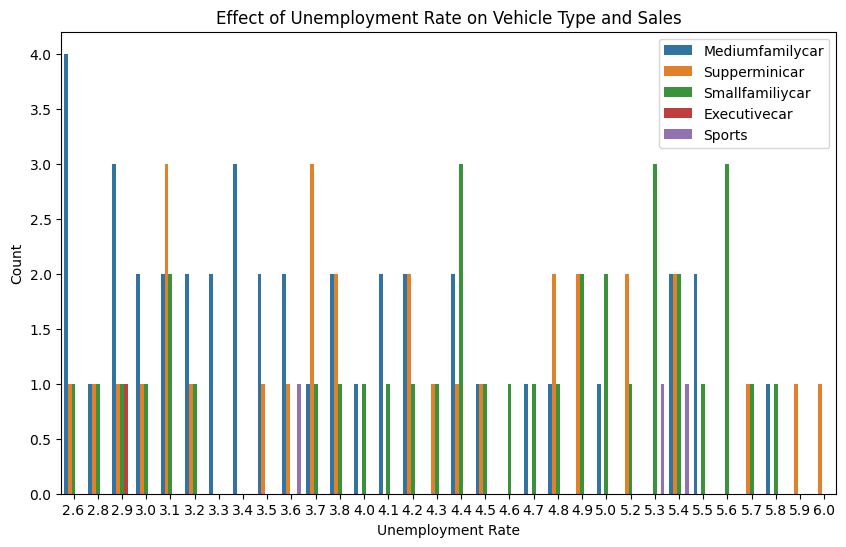

In [24]:
data= df[df['Recession'] == 1]
    
plt.figure(figsize=(10, 6))
    
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')
    
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

Inference:
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumfamilyicar.

---


### Cloropleth Map showing Recession Impact on Various Offices/City Sales (Folium)


In [25]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [26]:
recession_data = data[data['Recession'] == 1]

sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)


map1